## Introduction

##### $\rightarrow$ Provide a brief introduction to the purpose of this notebook.

#### This Notebook will attempt to determine if Seattle or New York City (NYC) has higher precipitation using data collected from the National Centers for Environmental Information (NOAA) from Jan. 1, 2020 to Jan. 1, 2024.

## Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

##### $\rightarrow$ Load the clean data set from Github.

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/eligunder/Seattle-Weather/main/merged_weather_data.csv')
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

##### $\rightarrow$ Review the contents of the data set.

In [7]:
df.tail()

,date,city,precipitation,month,year
2917,2023-12-27,new york,0.051538,12,2023
2918,2023-12-28,new york,1.845000,12,2023
2919,2023-12-29,new york,0.103571,12,2023
2920,2023-12-30,new york,0.006429,12,2023
2921,2023-12-31,new york,0.000714,12,2023


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2922 non-null   object 
 1   city           2922 non-null   object 
 2   precipitation  2921 non-null   float64
 3   month          2922 non-null   int32  
 4   year           2922 non-null   int32  
dtypes: float64(1), int32(2), object(2)
memory usage: 91.4+ KB


## State your questions

##### $\rightarrow$ List your questions about the data that will help you solve the problem.

### On average, does it rain more in Seattle or NYC?

### Do Seattle and NYC demonstrate variation in total rain year-to-year?

### Do Seattle and NYC demonstrate variation in total rain month-to-month?

## Analysis

# Comparing cumulative averages and sums of Seattle vs. New York City precipitation

## First, let's look at some of the summary statistics grouped by city



In [9]:
df.iloc[:, :3].groupby(by='city').describe().round(3)

precipitation                                             
                 count   mean    std  min  25%    50%    75%    max
city                                                               
new york        1461.0  0.134  0.309  0.0  0.0  0.012  0.122  4.245
seattle         1460.0  0.116  0.233  0.0  0.0  0.016  0.132  2.710

#### New York has a marginally higher mean precipitation than Seattle. Seattle and NYC has similar medians. Seattle has a slightly higher 75th percentile.

### Now we will save this summary to a data frame to use in our report

In [10]:
summary_df = df.iloc[:, :3].groupby(by='city').describe().round(3)
summary_df.to_csv("weather_summary.csv")

## - Next, let's look at a simple bar plot to compare averages

<ipython-input-11-72125af163d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='city', y='precipitation', palette={'new york': 'orange', 'seattle': seattle_color})


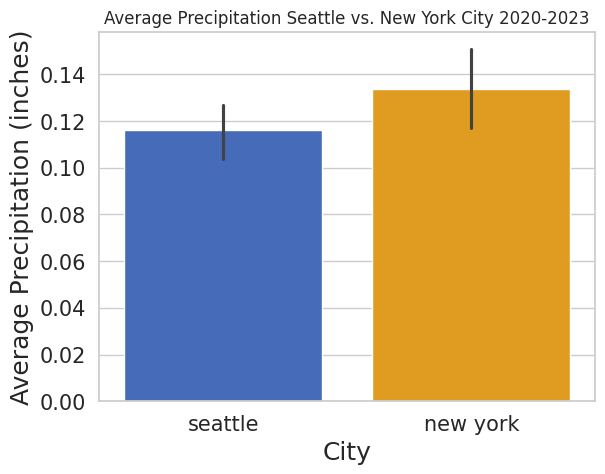

In [11]:
seattle_color = (0.2, 0.4, 0.8) #Create Seattle color to use for rest of visualizations
sns.barplot(data=df, x='city', y='precipitation', palette={'new york': 'orange', 'seattle': seattle_color})

plt.xlabel('City', fontsize=18)
plt.ylabel('Average Precipitation (inches)', fontsize=18)
plt.title("Average Precipitation Seattle vs. New York City 2020-2023")
plt.tick_params(labelsize=15);

#### The above box plot visualizes NYC's marginally higher precipitation average.

## Finally, let's look at the cumulative precipitation in Seattle and New York City from 2020 to the end of 2023

<ipython-input-12-4a821d7790f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='city', y='precipitation', estimator = sum, palette={'new york': 'orange', 'seattle': seattle_color})


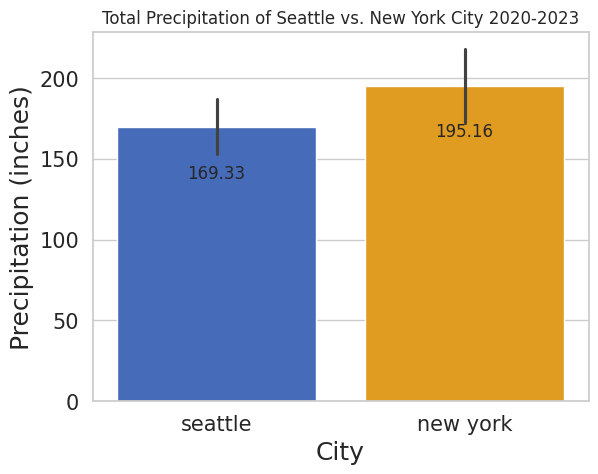

In [12]:
seattle_color = (0.2, 0.4, 0.8)
ax = sns.barplot(data=df, x='city', y='precipitation', estimator = sum, palette={'new york': 'orange', 'seattle': seattle_color})

for p in ax.patches: #Create labels and position them to more easily compare sums of precipitation
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, -33),
                textcoords = 'offset points',
                fontsize=12)

plt.xlabel('City', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.title('Total Precipitation of Seattle vs. New York City 2020-2023')

plt.tick_params(labelsize=15);

## To take a reductive approach to answer our research question, we can say that it rained more in New York City from 2020-2023 by about 24 inches. This answer doesn't paint the full picture though, so we will break down our data by month and year to further investigate our research question.

# Do Seattle and NYC demonstrate variation in total rain year-to-year?

## First, we will look at a lineplot showing average precipitation across all years

<ipython-input-13-d2edd9d95b9b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='precipitation', hue='city', ci = None)


Text(0.5, 1.0, 'Average Precipitation by Year')

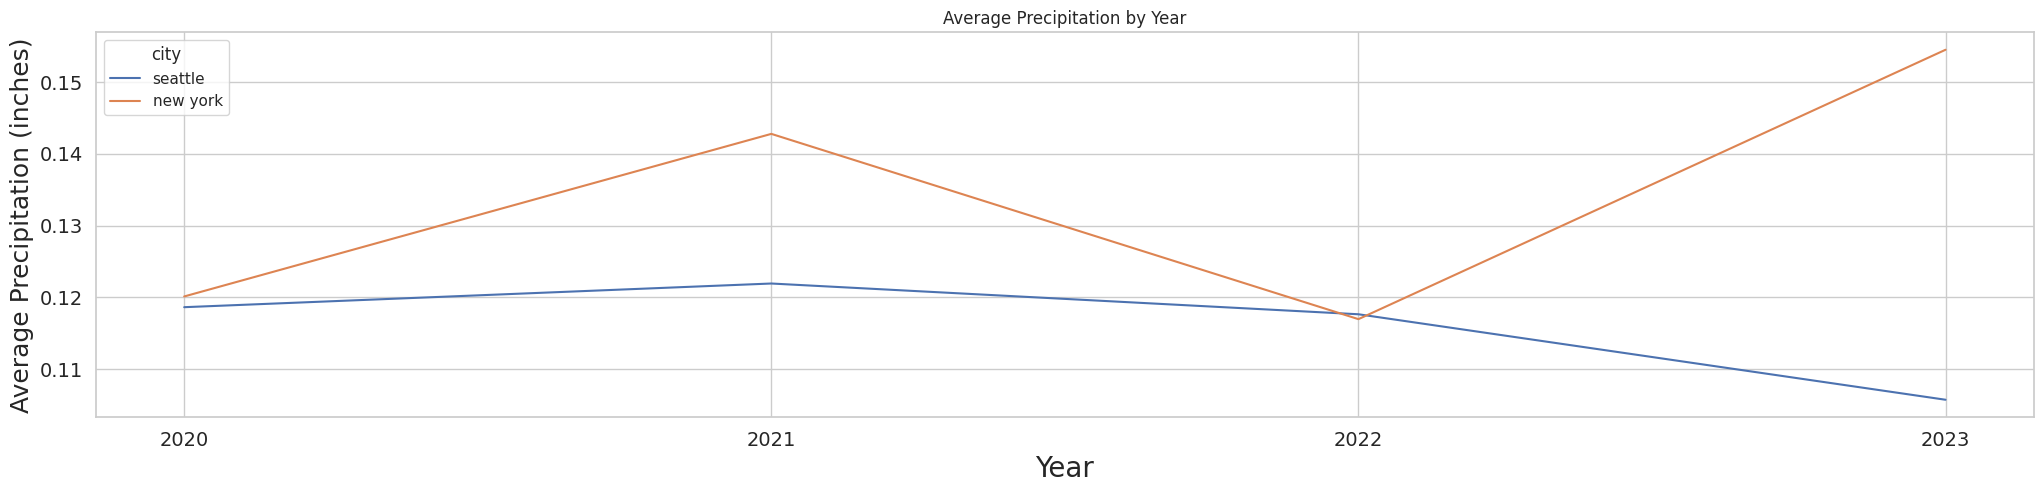

In [13]:
plt.figure(figsize=(25,5))

sns.lineplot(data=df, x='year', y='precipitation', hue='city', ci = None)

plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Precipitation (inches)', fontsize=18)
plt.xticks(np.arange(2020, 2024, 1))

plt.tick_params(labelsize=14);
plt.title("Average Precipitation by Year")

#### New York City has more variation year to year than Seattle, although the it is difficult to make conclusions with such a limited date range.

## Next, we will measure total precipitation by year

Text(0.5, 1.0, 'Total Precipitation by Year')

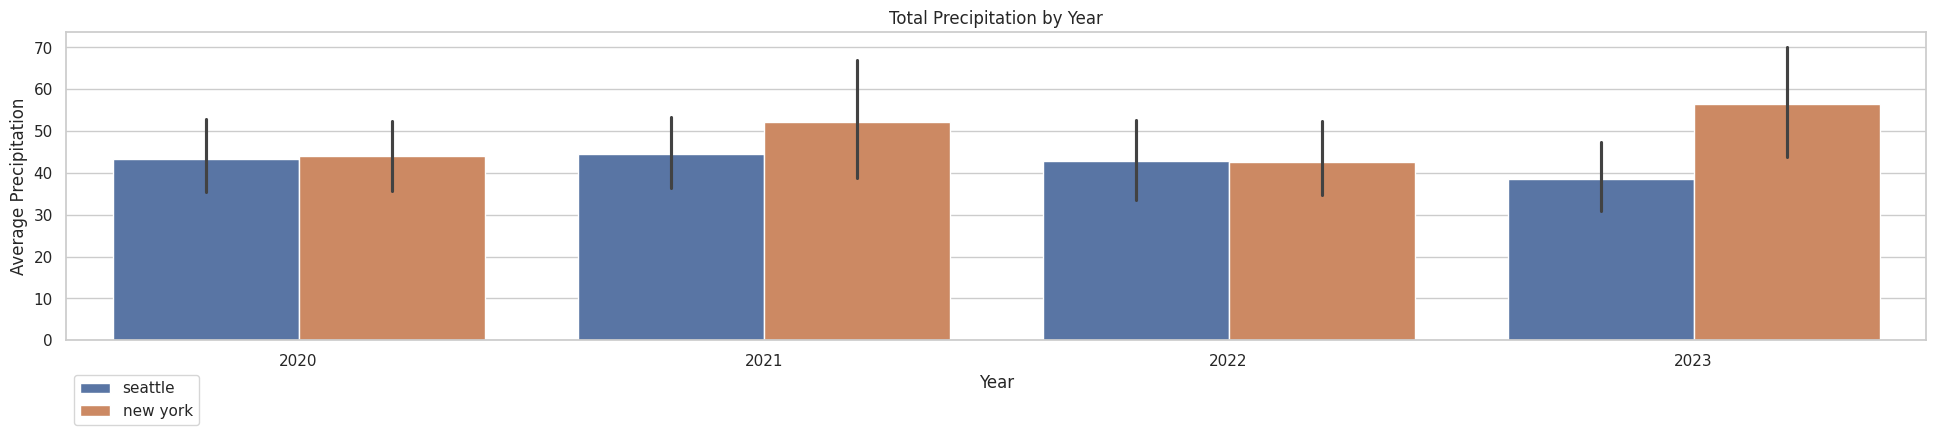

In [14]:
plt.figure(figsize=(24,4))

sns.barplot(data = df, x = 'year', y = 'precipitation', hue='city', estimator = sum);

plt.legend(bbox_to_anchor=(0, -0.3), loc='lower left')
plt.xlabel("Year")
plt.ylabel("Average Precipitation")
plt.title("Total Precipitation by Year")

#### Similar results to the line plot. New York had more precipitation in 2021 and 2023, while Seattle's precipitation was relatively constant year-to-year

## Now we will compare two years using scatter plots to see if we can determine where the difference in precipitation is occuring in each year from a preliminary glance, although this will be investigated more in the next section. The below scatter plots show precipitation for 2020, a year where total precipitation was similar between Seattle and NYC, and 2023, a year where precipitation in NYC was higher than in Seattle.

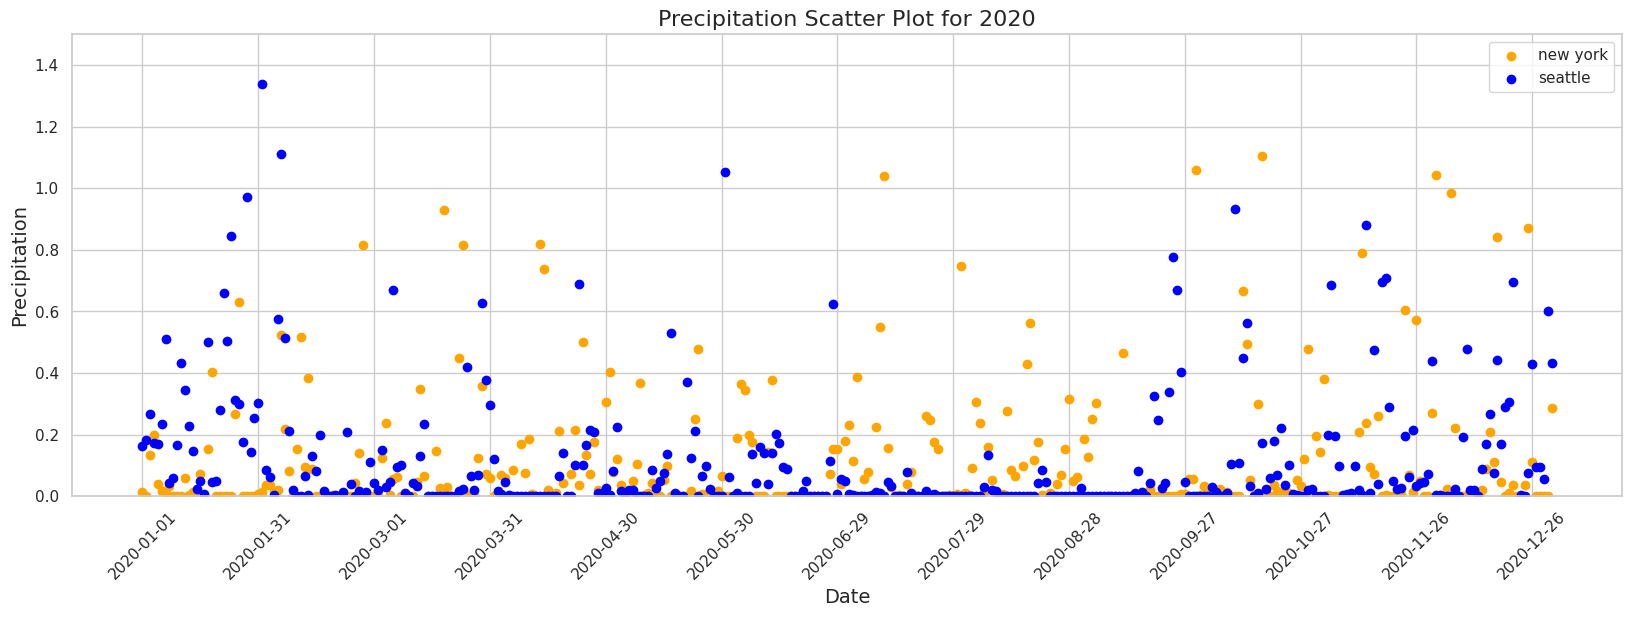

In [15]:
year_to_plot = 2020

df_year = df[df['year'] == year_to_plot]

plt.figure(figsize=(20, 6))

for city, color in zip(['new york', 'seattle'], ['orange', 'blue']): #Assign colors to dots based on city
    city_data = df_year[df_year['city'] == city]
    plt.scatter(city_data['date'], city_data['precipitation'], color=color, label=city)

plt.title('Precipitation Scatter Plot for 2020', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

unique_dates = sorted(df_year['date'].unique())[::30] #Set x-axis labels to be once every 30 days
plt.xticks(ticks=unique_dates, rotation = 45)

plt.ylim(0,1.5)
plt.legend()
plt.show()

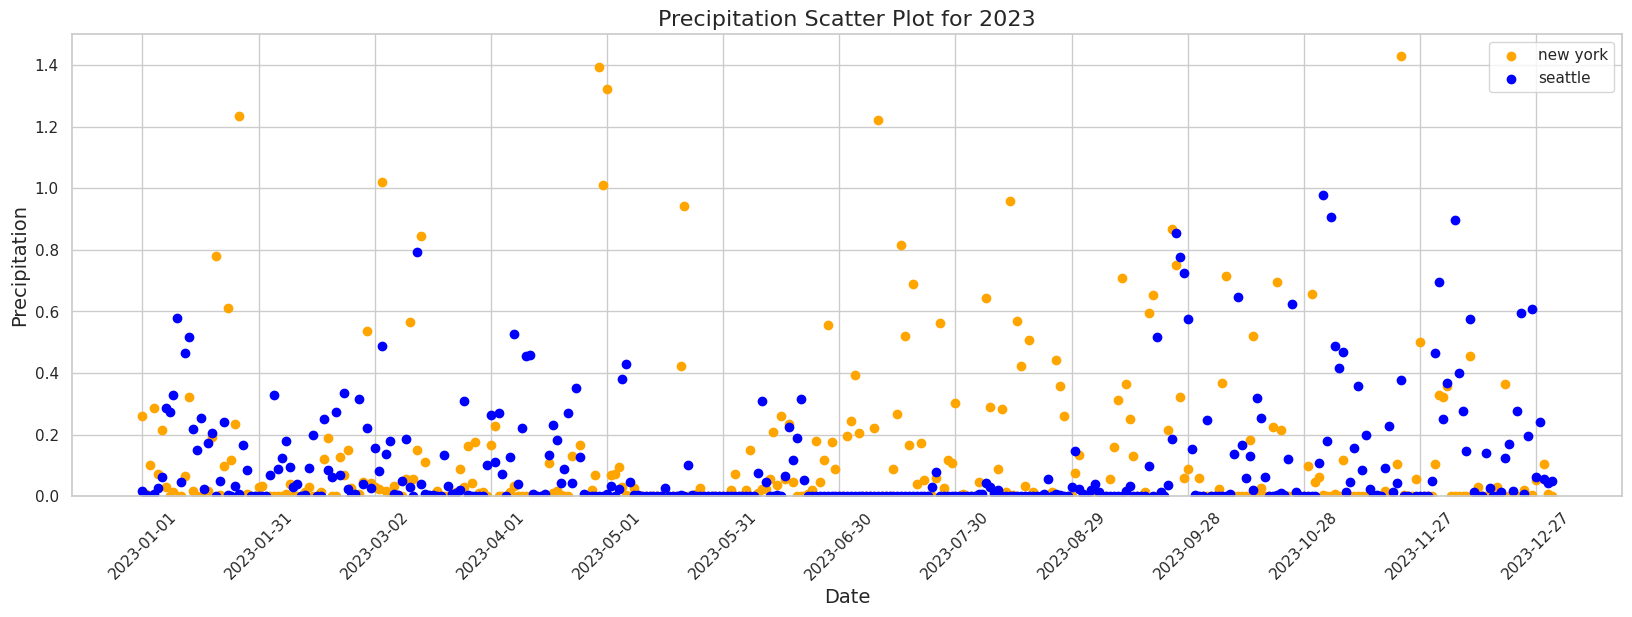

In [16]:
year_to_plot = 2023

df_year = df[df['year'] == year_to_plot]

plt.figure(figsize=(20, 6))

for city, color in zip(['new york', 'seattle'], ['orange', 'blue']):
    city_data = df_year[df_year['city'] == city]
    plt.scatter(city_data['date'], city_data['precipitation'], color=color, label=city)

plt.title('Precipitation Scatter Plot for 2023', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

unique_dates = sorted(df_year['date'].unique())[::30]
plt.xticks(ticks=unique_dates, rotation = 45)

plt.ylim(0,1.5)
plt.legend()
plt.show()

#### The Scatter Plot for 2023 demonstrates an increased rainfall in NYC from June to August relative to Seattle. This spike in rainfall in NYC is also demonstrated in the 2020 scatter plot, but to a lesser degree. In the 2020 scatter plot, Seattle crowds out NYC in total rainy days during January and December, although this is less pronounced in the 2023 scatter plot.

# Do Seattle and NYC demonstrate variation in total rain month-to-month?

### To further investigate variation in precipitation by month for Seattle vs. NYC, we will have to group all data by month. The blow box plot shows the average precipitation by month for Seattle vs. NYC across the entire data set.

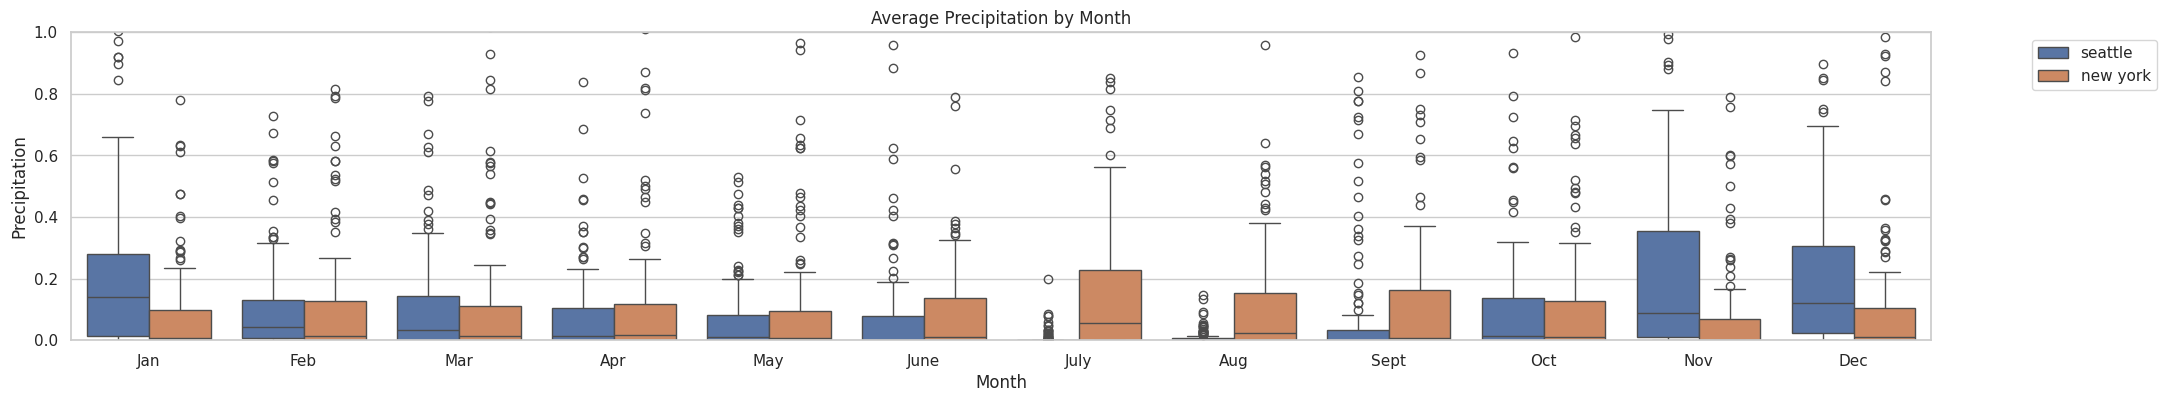

In [17]:

plt.figure(figsize=(24,4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue='city');

plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Month")
plt.ylabel("Precipitation")
plt.title("Average Precipitation by Month")
plt.ylim(0,1);



#### Seattle has greater average  precipitation than NYC on January, November, and December. Meanwhile, NYC has greater precipitation in June, July, August and September.

## Next we will plot the averages using a line plot to simplify the visualization

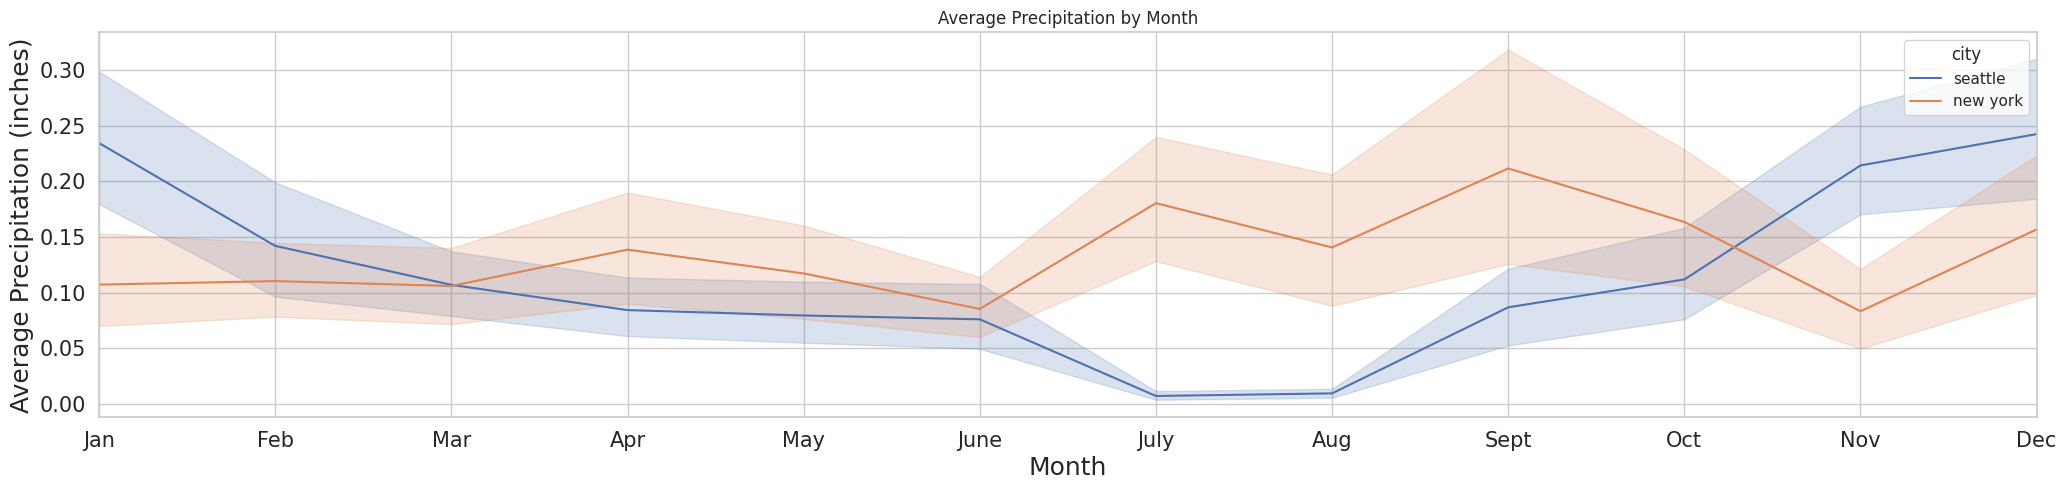

In [18]:
plt.figure(figsize=(25,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Average Precipitation (inches)', fontsize=18)

plt.xticks(ticks=np.arange(12)+1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.xlim(1, 12)
plt.title("Average Precipitation by Month")
plt.tick_params(labelsize=15);

#### The Lineplot reveals that NYC had higher precipitation than Seattle in July, August and September, now showing only a marginal difference in precipitation between the two cities in June.

## For our last plot, we will make a bar plot of the difference in precipitation between Seattle and New York City by month. This will provide a clear visualization of which months see more rain in Seattle, and which months see more rain in NYC.

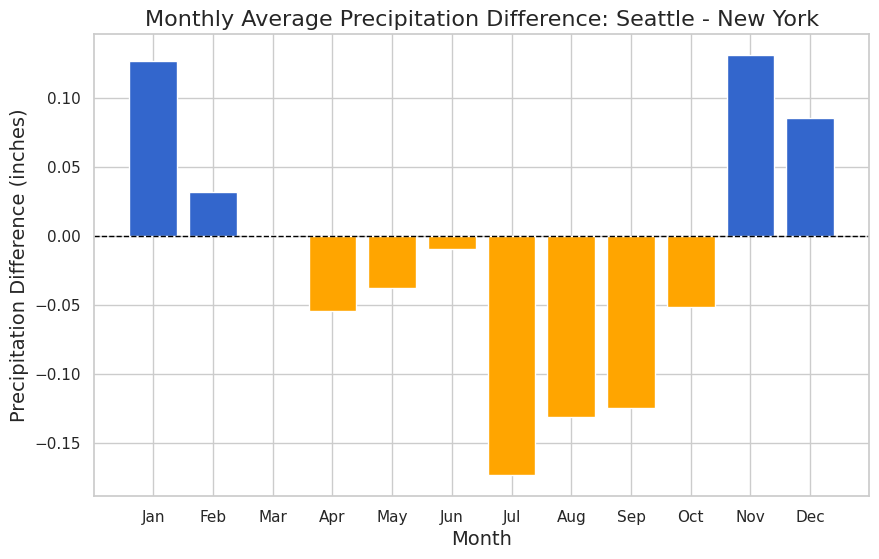

In [19]:
seattle_data = df[df['city'] == 'seattle']
new_york_data = df[df['city'] == 'new york']

seattle_monthly_precipitation = seattle_data.groupby('month')['precipitation'].mean()
new_york_monthly_precipitation = new_york_data.groupby('month')['precipitation'].mean() #Separate the Seattle entries from the NYC entries

difference = seattle_monthly_precipitation - new_york_monthly_precipitation #Calculate difference between Seattle and NYC precipitation

plt.figure(figsize=(10, 6))

plt.bar(difference.index, difference.values, color=[seattle_color if x > 0 else 'orange' for x in difference.values], label='Difference') #Set months where it rains more in Seattle as blue, and months where it rains more in NYC as orange

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Month', fontsize=14)
plt.ylabel('Precipitation Difference (inches)', fontsize=14)
plt.title('Monthly Average Precipitation Difference: Seattle - New York', fontsize=16)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

#### The resulting graph confirms earlier findings regarding which months it rains more in each city. The original research question was crafted because a NYC family did not want to go to Seattle because they believed it rained more there. The above visualization demonstrates that on average it rains more in NYC 7 months out of the year.

### Results for communication assignment

[Communication Assignment](https://github.com/eligunder/Seattle-Weather/blob/main/Communicate%20Project%201.docx)

## Conclusion

#### NYC and Seattle have similar amounts of rain, but demonstrate significant differences in average precipitation month to month. Seattle has greater average precipitation than NYC in January, November, and December. Meanwhile, NYC has greater precipitation in July, August and September. NYC had greater total precipitation in 2021 and 2023. In 2020 and 2022, the two cities had nearly the same amount of total precipitation. NYC demonstrated greater variation in total precipitation year-to-year than Seattle.


